### MTH 459/559 - ch 15 Monte Carlo method

In [1]:
# ch15_monte_carlo.ipynb  
import numpy as np # library for numerical & math calculations
import matplotlib.pyplot as plt # library for graphing 
import scipy.stats as sp # library with prob/stat functions

**Outline:**  
I. simple Monte Carlo for estimating mean with confidence interval  
II. illustration of convergence of estimates as M increases  
III. usage to calculate value of European Call option

In [2]:
# I. simple Monte Carlo example
# set parameters and generate random sample
mu = 0
sigma = 1
M = 100
X = sp.norm.rvs(loc=mu,scale=sigma,size=M);
# use sample to estimate mean, std deviation, confidence interval
aM = np.mean(X);
bM = np.sqrt(np.var(X,ddof=1))
cM = aM - 1.96*bM/np.sqrt(M)
dM = aM + 1.96*bM/np.sqrt(M)
print('exact values:')
print('mean = ',mu,' standard deviation = ',sigma)
print('estimates:')
print('mean = ',aM,' standard deviation = ',bM)
print('95% confidence interval:')
print('95% confidence interval: ',cM,' < mu < ',dM)

exact values:
mean =  0  standard deviation =  1
estimates:
mean =  -0.11672152325412076  standard deviation =  1.0990016908156817
95% confidence interval:
95% confidence interval:  -0.33212585465399436  < mu <  0.09868280814575285


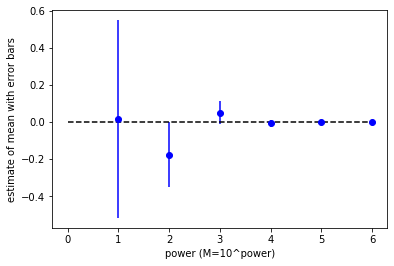

In [3]:
# II. show convergence of estimates as M increases
maxpower = 6
for power in range(1,maxpower+1):
    M = 10**power
    X = sp.norm.rvs(loc=mu,scale=sigma,size=M)
    aM = np.mean(X);
    bM = np.sqrt(np.var(X,ddof=1))
    a_err = 1.96*bM/np.sqrt(M)  # size of error bars
    cM = aM - a_err  # confidence interval
    dM = aM + a_err
    #print(M,aM,a_err)
    plt.errorbar(power,aM,yerr=a_err,fmt='bo')
plt.hlines(0,0,maxpower,colors='k',linestyles='dashed')
plt.xlabel('power (M=10^power)')
plt.ylabel('estimate of mean with error bars')
plt.show()    

In [4]:
# III. monte carlo estimate of option price
def monte_carlo_euro(S,K,T,r,sigma,M):
    nu = r - 0.5*sigma**2
    C = np.zeros(M);
    for j in range(M):
        Z = sp.norm.rvs(); # random var from standard normal dist
        ST = S*np.exp(nu*T + sigma*np.sqrt(T)*Z); # asset model 
        C[j] = np.exp(-r*T)*max(ST-K,0); # value of European Call
        #print(j,Z,ST,C[j])
    aM = np.mean(C);
    bM = np.sqrt(np.var(C,ddof=1));
    return [aM, bM];

# functions for exact value of European Call for comparison
def d1(S,K,T,t,r,sigma):
    d1 = (np.log(S/K) + (r+0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    return d1
def d2(S,K,T,t,r,sigma):
    d2 = (np.log(S/K) + (r-0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    return d2
def C_euro(S,K,T,t,r,sigma):
    C_euro = S*sp.norm.cdf(d1(S,K,T,t,r,sigma))-\
        K*np.exp(-r*(T-t))*sp.norm.cdf(d2(S,K,T,t,r,sigma)) 
    return C_euro

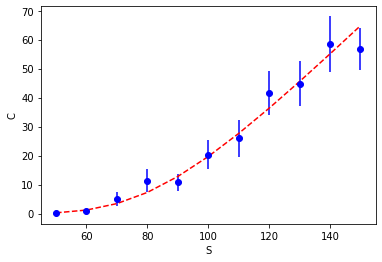

In [5]:
# find option value C(S) using Monte Carlo
r = 0.05
sigma = 0.3
t = 0
T = 1
K = 90
M = 100 # number of Monte Carlo simulations

# set up array to find function of S
nfine = 11
S = np.linspace(50,150,nfine)
aM = np.zeros(nfine)
a_err = np.zeros(nfine)
Cexact = np.zeros(nfine)
for k in range(nfine):  # loop over all S values
    [aM[k],bM] = monte_carlo_euro(S[k],K,T,r,sigma,M)
    a_err[k] = 1.96*bM/np.sqrt(M)
    Cexact[k] = C_euro(S[k],K,T,t,r,sigma) # exact value 
plt.errorbar(S,aM,yerr=a_err,fmt='bo')
plt.plot(S,Cexact,'r--')
plt.xlabel('S')
plt.ylabel('C')
plt.show()